This is an example for using eyeCode with source code as stimulus. It was presented at the "Fourth Workshop on Eye Movements in Programming: Spring Academy 2017" (http://emipws.org/emip17-spring-academy/) and is based on tutorials provided by Mike Hansen (see https://github.com/synesthesiam/eyecode).

In [1]:
%run prelude.ipy
import pandas
from StringIO import StringIO
from eyecode import aoi, plot

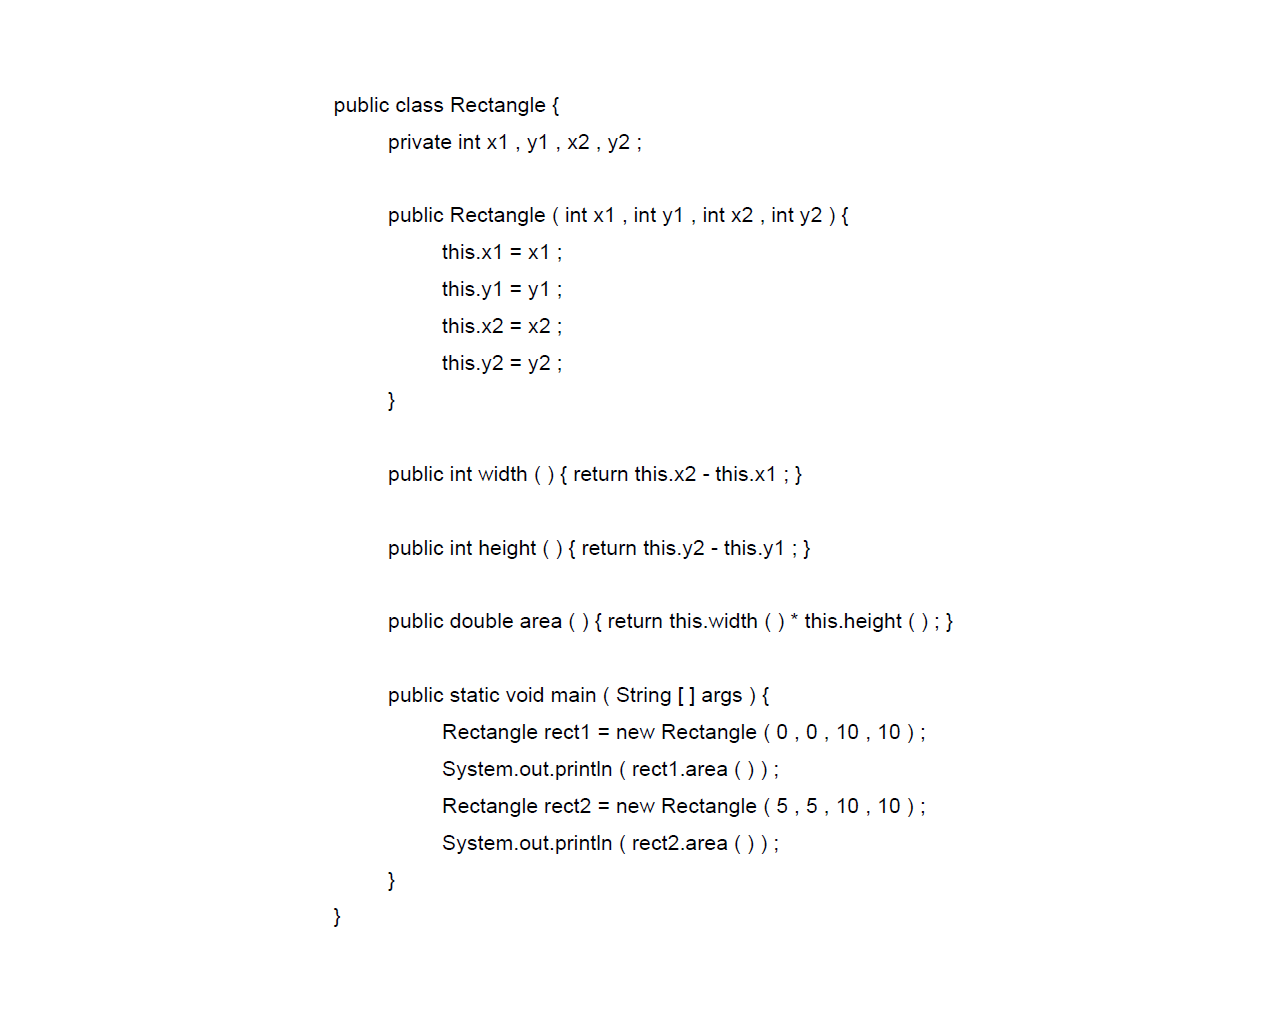

In [2]:
# Load screenshot from experiment
filename_img="sc1.png"
text_img = Image.open(filename_img)
text_img

In [3]:
# Find AOIs
aois = aoi.find_rectangles(text_img)
aois.kind.unique()
aois

kind             name    x    y  width  height  local_id
0        line           line 1  334   97    226      20       NaN
1    sub-line    line 1 part 1  334   97     57      20       NaN
2    sub-line    line 1 part 2  395   97     50      20       NaN
3    sub-line    line 1 part 3  450   97     97      20       NaN
4    sub-line    line 1 part 4  551   97     10      20       NaN
5        line           line 2  388  134    253      20       NaN
6    sub-line    line 2 part 1  388  134     65      20       NaN
7    sub-line    line 2 part 2  458  134     24      20       NaN
8    sub-line    line 2 part 3  486  134     21      20       NaN
9    sub-line    line 2 part 4  516  134      5      20       NaN
10   sub-line    line 2 part 5  527  134     20      20       NaN
11   sub-line    line 2 part 6  556  134      5      20       NaN
12   sub-line    line 2 part 7  567  134     24      20       NaN
13   sub-line    line 2 part 8  596  134      6      20       NaN
14   sub-line    line 2 part 9  607  134     24      20       NaN
15   sub-line   line 2 part 10  637  134      5      20       NaN
16       line           line 3  388  207    461      20       NaN
17   sub-line    line 3 part 1  388  207     57      20       NaN
18   sub-line    line 3 part 2  450  207     97      20       NaN
19   sub-line    line 3 part 3  552  207      8      20       NaN
20   sub-line    line 3 part 4  565  207     24      20       NaN
21   sub-line    line 3 part 5  593  207     21      20       NaN
22   sub-line    line 3 part 6  623  207      5      20       NaN
23   sub-line    line 3 part 7  634  207     24      20       NaN
24   sub-line    line 3 part 8  662  207     21      20       NaN
25   sub-line    line 3 part 9  691  207      6      20       NaN
26   sub-line   line 3 part 10  703  207     24      20       NaN
27   sub-line   line 3 part 11  731  207     23      20       NaN
28   sub-line   line 3 part 12  760  207      6      20       NaN
29   sub-line   line 3 part 13  771  207     25      20       NaN
..        ...              ...  ...  ...    ...     ...       ...
132  sub-line   line 14 part 6  761  761      8      20       NaN
133  sub-line   line 14 part 7  774  761      5      20       NaN
134      line          line 15  442  798    483      20       NaN
135  sub-line   line 15 part 1  442  798     97      20       NaN
136  sub-line   line 15 part 2  544  798     48      20       NaN
137  sub-line   line 15 part 3  598  798     13      20       NaN
138  sub-line   line 15 part 4  616  798     41      20       NaN
139  sub-line   line 15 part 5  661  798     97      20       NaN
140  sub-line   line 15 part 6  763  798      8      20       NaN
141  sub-line   line 15 part 7  776  798     13      20       NaN
142  sub-line   line 15 part 8  795  798      5      20       NaN
143  sub-line   line 15 part 9  806  798     13      20       NaN
144  sub-line  line 15 part 10  824  798      6      20       NaN
145  sub-line  line 15 part 11  837  798     23      20       NaN
146  sub-line  line 15 part 12  866  798      5      20       NaN
147  sub-line  line 15 part 13  878  798     24      20       NaN
148  sub-line  line 15 part 14  907  798      8      20       NaN
149  sub-line  line 15 part 15  921  798      5      20       NaN
150      line          line 16  442  835    336      20       NaN
151  sub-line   line 16 part 1  442  835    171      20       NaN
152  sub-line   line 16 part 2  619  835      8      20       NaN
153  sub-line   line 16 part 3  632  835     97      20       NaN
154  sub-line   line 16 part 4  734  835      8      20       NaN
155  sub-line   line 16 part 5  747  835      8      20       NaN
156  sub-line   line 16 part 6  761  835      8      20       NaN
157  sub-line   line 16 part 7  774  835      5      20       NaN
158      line          line 17  387  872      8      20       NaN
159  sub-line   line 17 part 1  387  872      9      20       NaN
160      line          line 18  333  908      8  

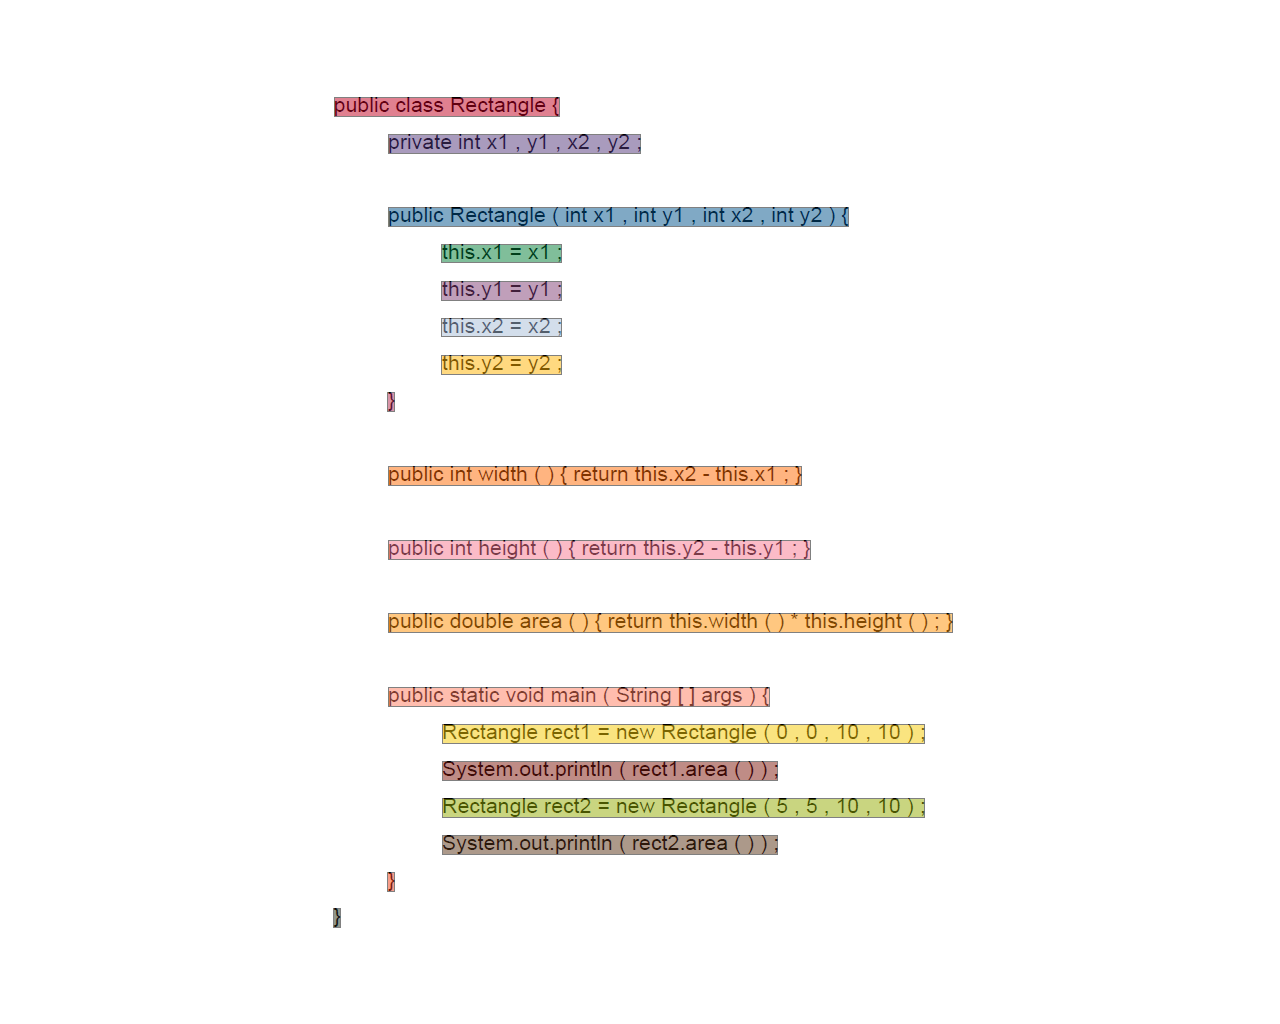

In [4]:
# Plot AOIs (whole line)
line_aois = aois[aois.kind == "line"]
plot.draw_rectangles(line_aois, text_img) 

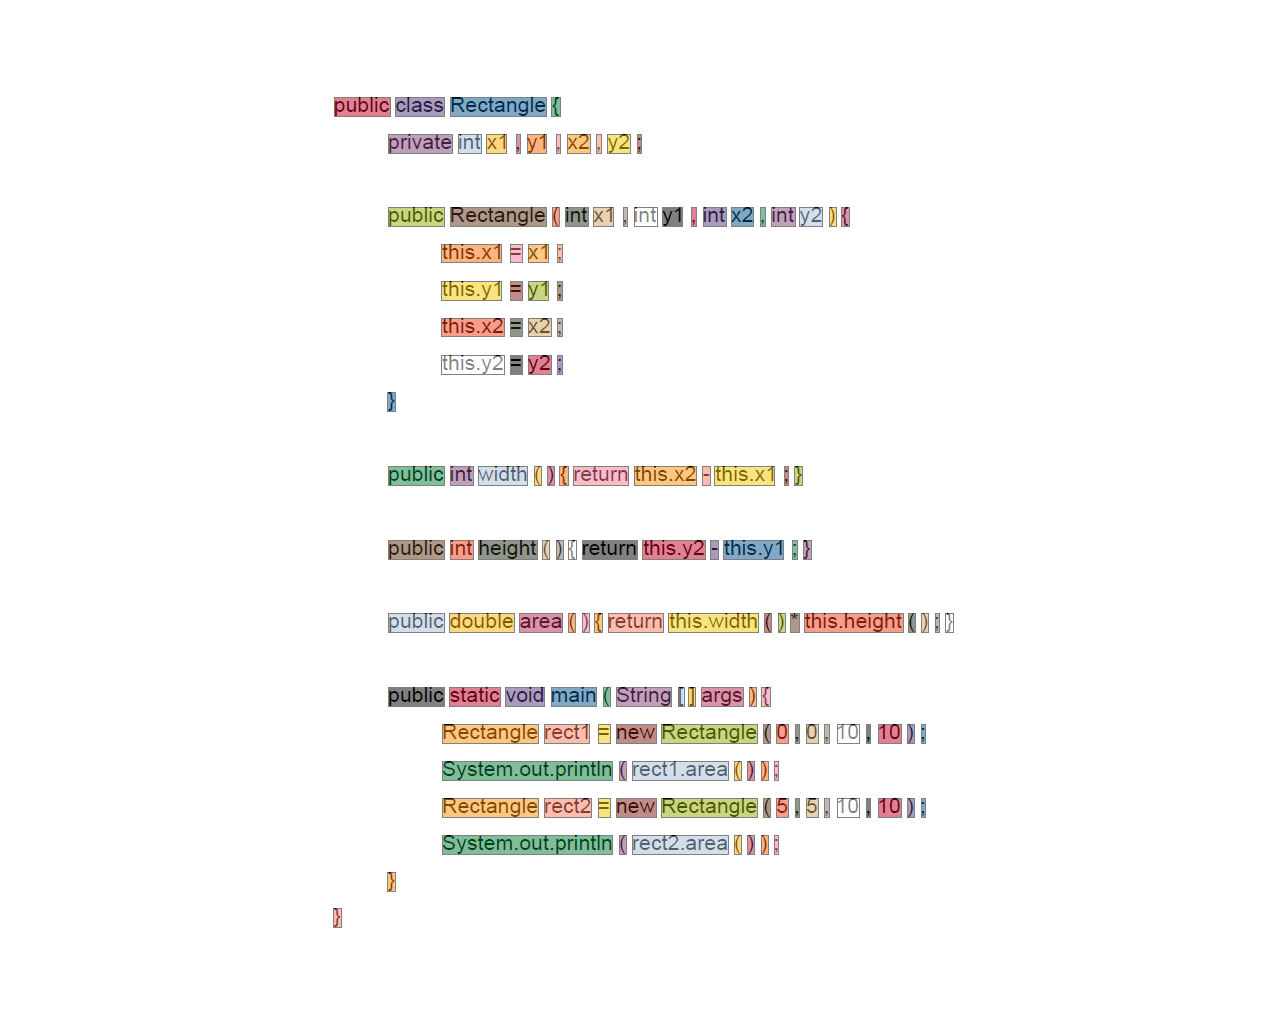

In [5]:
# Plot AOIs (single code elements)
word_aois = aois[aois.kind == "sub-line"]
plot.draw_rectangles(word_aois, text_img)

In [6]:
# Expand AOIs
y_border_above_aoi = 7
y_border_below_aoi = 7                
aois_padded = aoi.pad(aois, [y_border_above_aoi, 0, y_border_below_aoi, 0]) 
line_aois = aois_padded[aois_padded.kind == "line"]
word_aois = aois_padded[aois_padded.kind == "sub-line"]
plot.draw_rectangles(word_aois, text_img)

In [7]:
# Save AOIs
aois_padded.to_csv("sc1_aois.csv")    

In [8]:
# Load fixations
fixations = pandas.read_csv("sc1_fixations.csv")             

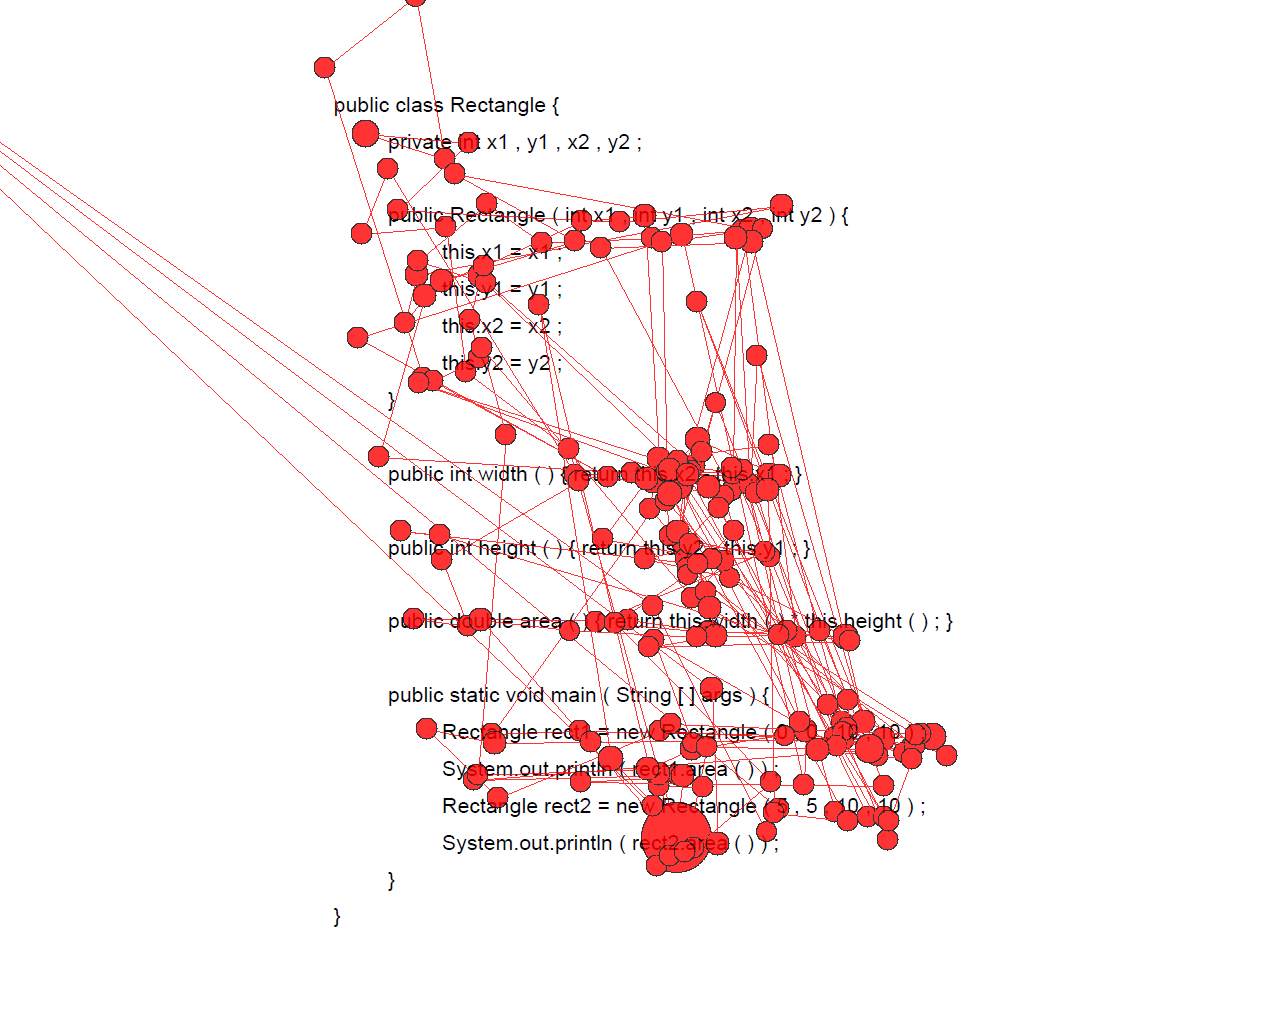

In [9]:
# Plot fixations
plot.fix_circles(fixations, text_img)

In [10]:
# Map fixations to AOIs (hit testing)
aoi_fixations = aoi.hit_test(fixations, aois_padded, hit_fun="point")
aoi_fixations

fix_x  fix_y  duration_ms  start_ms  end_ms offset_kind aoi_line  \
0      423    378          184       250     434        none      NaN   
1      325     68          200       567     767        none      NaN   
2      416     -4          183       867    1050        none      NaN   
3      445    159          283      1284    1567        none   line 2   
4      366    134          867      2034    2901        none      NaN   
5      469    143          317      2951    3268        none   line 2   
6      398    210          233      3352    3585        none   line 3   
7      620    222          183      3785    3968        none   line 3   
8      782    206          383      4102    4485        none   line 3   
9      417    275          433      4552    4985        none      NaN   
10     405    323          317      5619    5936        none      NaN   
11     425    296          466      5953    6419        none      NaN   
12     379    457          350      6470    6820        none      NaN   
13     632    473          167      7103    7270        none   line 9   
14     575    475          233      7287    7520        none   line 9   
15     670    484          166      7537    7703        none   line 9   
16     492    734          200     12822   13022        none  line 13   
17     580    731          200     13106   13306        none  line 13   
18     784    735          150     13356   13506        none  line 13   
19     884    739          434     13539   13973        none  line 13   
20     591    742          250     14006   14256        none  line 13   
21     495    743          451     14706   15157        none  line 13   
22     427    729          167     15240   15407        none      NaN   
23     498    798          233     15457   15690        none  line 15   
24     660    731          166     16024   16190        none  line 13   
25     844    740          267     16224   16491        none  line 13   
26     913    746          334     16507   16841        none  line 13   
27     474    780          333     17291   17624        none  line 14   
28     678    775          300     17975   18275        none  line 14   
29     703    787          184     18291   18475        none  line 14   
..     ...    ...          ...       ...     ...         ...      ...   
168    868    817          317     81102   81419        none  line 15   
169    709    487          484     81452   81936        none   line 9   
170    670    470          417     81952   82369        none   line 9   
171    884    817          183     82653   82836        none  line 15   
172    719    508          217     82886   83103        none      NaN   
173    688    475          451     83119   83570        none   line 9   
174    888    840          233     83603   83836        none      NaN   
175    732    468          283     83987   84270        none   line 9   
176    768    490          366     84287   84653        none   line 9   
177    774    813          234     84920   85154        none  line 15   
178    848    821          183     85204   85387        none  line 15   
179    670    494          683     85454   86137        none      NaN   
180    712    559          167     86187   86354        none  line 10   
181    787    631          250     86421   86671        none  line 11   
182    850    641          283     86721   87004        none      NaN   
183    649    647          250     87288   87538        none      NaN   
184    716    636          384     87571   87955        none  line 11   
185    698    564          183     88005   88188        none  line 10   
186    401    531          167     88355   88522        none      NaN   
187    440    535          316     88539   88855        none  line 10   
188    779    635          200     88889   89089        none  line 11   
189    697    637          166     89139   89305        none  line 11   
190    569    630          150     89322   89472        none  l

In [11]:
# Save mapped fixations
aoi_fixations.to_csv("mapped_fixations_sc1.csv")   

Fixations and AOIs can be viewed in realtime in a web browser using the HTML fixation viewer in the `viewer` directory of the eyeCode examples.

You will need four pieces for each trial:

1. A screen image in the `viewer/screens` with the name `<experiment>_<trial>.png` where `<experiment>` and `<trial>` are id numbers.

2. A fixations JSON file in `viewer/js/trials` named `<experiment>_<trial>.fixations.js`. Use `aoi.fixations_to_json` with your hit-tested fixations to generate this.

3. An AOI JSON file in `viewer/js/trials` named `<experiment>_<trial>.aois.js`. Use `aoi.aois_to_json` with your AOI DataFrame to generate this.

4. A tag JSON 
3. An AOI JSON file in `viewer/js/trials` named `<experiment>_<trial>.tags.js`.

In [12]:
# Save the screen image
text_img.save("viewer/screens/2_1.png")

In [13]:
# Generate and save the hit-tested fixations to JSON
js_fixations = aoi.fixations_to_json(aoi_fixations)
with open("viewer/js/trials/2_1.fixations.js", "w") as out_file:
          out_file.write(js_fixations)

In [14]:
# Generate and save the AOI rectangles to JSON
js_aois = aoi.aois_to_json(aois_padded)
with open("viewer/js/trials/2_1.aois.js", "w") as out_file:
    out_file.write(js_aois)

In [15]:
# Read manual tags and save to JSON
manual_tags = pandas.read_csv("sc1_manual_tags.csv")
js_buf = StringIO()
manual_tags.to_json(js_buf, orient="records")
with open("viewer/js/trials/2_1.tags.js", "w") as js_file:
    js_file.write(js_buf.getvalue())


To view your fixations locally, do the following:

1. Start a basic Python web server in the `viewer` directory by running `python -m SimpleHTTPServer`

2. Visit http://localhost:8000/?exp_id=2&trial_id=1
       To change trials, just change the values for `exp_id` and `trial_id`. 
       To change the behavior of the viewer, edit `index.html` or `js/viewer.js`